In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('movies.csv')
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_ratings = df_ratings.drop(columns=['timestamp'])

In [6]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
df_movies = data
df_movies['title'] = df_movies['title'].str[:-6]
df_movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [8]:
import pickle
df_tmdb = pickle.load(open('new.pkl','rb'))

In [9]:
df_movies = df_movies.rename(columns={'movie_id': 'movie_id_ratings'})
df_tmdb = df_tmdb.rename(columns={'movie_id': 'movie_id_movies'})
df_tmdb.head()

,movie_id_movies,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [10]:
result = df_tmdb[df_tmdb['title'].str.contains('grumpieroldmen', case=False)]
result

,movie_id_movies,title,tags


In [11]:
df_movies

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy
9739,193585,Flint,Drama
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation


In [12]:
df_movies['title'] = df_movies['title'].str.lower()
df_tmdb['title'] = df_tmdb['title'].str.lower()
df_movies['title'] = df_movies['title'].str.replace(' ', '')
df_tmdb['title'] = df_tmdb['title'].str.replace(' ', '')


In [13]:
df_movies

,movieId,title,genres
0,1,toystory,Adventure|Animation|Children|Comedy|Fantasy
1,2,jumanji,Adventure|Children|Fantasy
2,3,grumpieroldmen,Comedy|Romance
3,4,waitingtoexhale,Comedy|Drama|Romance
4,5,fatherofthebridepartii,Comedy
...,...,...,...
9737,193581,blackbutler:bookoftheatlantic,Action|Animation|Comedy|Fantasy
9738,193583,nogamenolife:zero,Animation|Comedy|Fantasy
9739,193585,flint,Drama
9740,193587,bungostraydogs:deadapple,Action|Animation


In [14]:
df_tmdb = df_tmdb.drop(columns=['tags'])
df_tmdb

,movie_id_movies,title
0,19995,avatar
1,285,piratesofthecaribbean:atworld'send
2,206647,spectre
3,49026,thedarkknightrises
4,49529,johncarter
...,...,...
4804,9367,elmariachi
4805,72766,newlyweds
4806,231617,"signed,sealed,delivered"
4807,126186,shanghaicalling


In [15]:
merged_df = pd.merge(df_tmdb, df_movies, on='title', how='inner')
merged_df


,movie_id_movies,title,movieId,genres
0,19995,avatar,72998,Action|Adventure|Sci-Fi|IMAX
1,285,piratesofthecaribbean:atworld'send,53125,Action|Adventure|Comedy|Fantasy
2,206647,spectre,136020,Action|Adventure|Crime
3,49529,johncarter,93363,Action|Adventure|Sci-Fi|IMAX
4,559,spider-man3,52722,Action|Adventure|Sci-Fi|Thriller|IMAX
...,...,...,...,...
2818,14022,slacker,6978,Comedy|Drama
2819,692,pinkflamingos,2361,Comedy
2820,13898,thecircle,143365,Drama|Sci-Fi|Thriller
2821,36095,cure,4645,Crime|Horror|Thriller


In [16]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(df_ratings)

In [17]:
X.shape

(610, 9724)

Movie Similarity

In [18]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [19]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265]

User Similarity

In [20]:
from sklearn.neighbors import NearestNeighbors

def find_similar_users(userId, X, user_mapper, user_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    neighbour_ids = []

    user_index = user_mapper[userId]
    user_vector = X[user_index]
    if isinstance(user_vector, (np.ndarray)):
        user_vector = user_vector.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(user_vector, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(user_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [21]:
similar_users = find_similar_users(1,X,user_mapper,user_inv_mapper,k=10)
similar_users

[266, 313, 368, 57, 91, 469, 39, 288, 452]

In [22]:
a = df_ratings.loc[df_ratings['userId'] == 266].sort_values(by='movieId',ascending =False)

In [23]:
b = df_ratings.loc[df_ratings['userId'] == 1].sort_values(by='movieId',ascending =False)

In [24]:
c = pd.merge(a, b, on='movieId', how='inner')
c

,userId_x,movieId,rating_x,userId_y,rating_y
0,266,3052,5.0,1,5.0
1,266,2985,4.0,1,4.0
2,266,2959,5.0,1,5.0
3,266,2947,5.0,1,5.0
4,266,2916,5.0,1,4.0
...,...,...,...,...,...
62,266,223,4.0,1,3.0
63,266,110,5.0,1,4.0
64,266,50,4.0,1,5.0
65,266,6,4.0,1,4.0


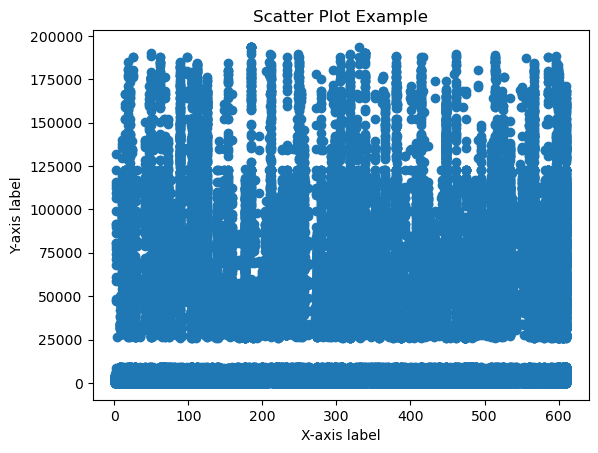

In [25]:
import matplotlib.pyplot as plt

M = df_ratings['userId']
N = df_ratings['movieId']
# Create scatter plot
plt.scatter(M, N)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot Example')

# Show plot
plt.show()


In [26]:
import pandas as pd
import numpy as np

def generate_ratings(num_users, movie_ids):
    """
    Generate ratings DataFrame based on the given number of users and movie IDs.

    Args:
        num_users (int): Number of users.
        movie_ids (pandas.Series): Series containing movie IDs.

    Returns:
        pandas.DataFrame: DataFrame with columns 'userId', 'movieId', and 'rating'.
    """
    ratings = []

    for user_id in range(1, num_users + 1):
        # Randomly select the number of movies the user rates (between 5 and 100)
        num_movies_rated = np.random.randint(5, 101)
        
        # Randomly select movie IDs the user will rate
        movies_rated = np.random.choice(movie_ids, size=num_movies_rated, replace=False)
        
        # Generate random ratings for the selected movies
        user_ratings = np.random.randint(1, 6, size=num_movies_rated)
        
        # Create tuples of (user_id, movie_id, rating) and append to the ratings list
        ratings.extend(zip([user_id] * num_movies_rated, movies_rated, user_ratings))
    
    # Create DataFrame from the ratings list
    df = pd.DataFrame(ratings, columns=['userId', 'movieId', 'rating'])
    
    return df

# Example usage:
# num_users = 1000
# df_movie_ids = df['movieId']  # Assuming df is your DataFrame containing movie IDs
# df_ratings = generate_ratings(num_users, df_movie_ids)


In [27]:
df_tmdb.head()

,movie_id_movies,title
0,19995,avatar
1,285,piratesofthecaribbean:atworld'send
2,206647,spectre
3,49026,thedarkknightrises
4,49529,johncarter


In [28]:
sup = generate_ratings(700, df_tmdb['movieId'])
sup

KeyError: 'movieId'

In [ ]:
a = sup['movieId']

In [ ]:
df_tmdb['movieId'].nunique()

4800

In [ ]:

df_tmdb = df_tmdb.rename(columns={"movie_id_movies": "movieId"})
df_tmdb.head()

,movieId,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [ ]:
common_df = pd.merge(df_tmdb, a, on=['movieId'], how='inner')
common_df.nunique()

movieId    4798
title      4795
tags       4804
dtype: int64

In [ ]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.

    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)

    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(sup)

In [ ]:
common_df.head()

,movieId,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
2,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
3,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
4,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."


In [ ]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_similar_users(userId, X, user_mapper, user_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    neighbour_ids = []

    user_index = user_mapper[userId]
    user_vector = X[user_index]
    if isinstance(user_vector, (np.ndarray)):
        user_vector = user_vector.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(user_vector, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(user_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [ ]:
similar_users = find_similar_users(1,X,user_mapper,user_inv_mapper,k=10)


[179, 673, 669, 74, 122, 671, 189, 322, 494]

In [ ]:
type(similar_users)

NameError: name 'similar_users' is not defined